# Homework 1
Climate Modeling, ATS 421/521, Spring 2018

## Draft due Apr. 9; Final due Apr. 12

Start by specifing inline plots and import all the modules you'll need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# the following helper function is used to add color to outputs
colors = {
    'red': 41,
    'green': 42
}

def color_format(s, color):
    return '\033[{}m{}\033[0m'.format(colors[color], s)

## 1.	Implement the "Not-quite-so-simple" climate model to determine temperature as a function of time in a Python program. 

See Lecture 2. Use the present solar constant (342 Wm⁻²), and start with a temperature of 289 K. Using a time step ∆t=10 days, run the model until the temperature approaches equilibrium.   

Save the temperature values for each time step in a list.

In [2]:
# Provide a general description of the model 

""" Not-quite-so-simple model! (Simple Albedo Feedback)
This model takes into account the greenhouse effect and how albedo changes as a function of temperature.
Unlike our first simple model, here albedo is not a constant value. As temperature rises, we move towards an ice-free
world. Such world reflects less solar radiation, which means an increase in radiative flux (ASR - OLR) and temperature.
This creates a positive feedback loop and decreases albedo even more until we reach a stable state.
The same feedback loop happens in reverse as temperature declines.
"""

# Define constant variables. 
s_b_constant = 5.67 * 10 ** -8     # Stefan-boltzmann constant (W.(m2.K4))
solar_constant = 342               # W/m2
effective_emiss = 0.614            # Effective emissivity
heat_capacity = 2.2 * 10 ** 8      # Heat capacity of water (oceans) and air (J/(m2.K))

albedo_min=0.3
albedo_max=0.7
temperature_upper=280
temperature_lower=250
m = (albedo_max - albedo_min) / (temperature_upper - temperature_lower)    # slope of albedo function (a(t))


# Decribe the methodology such that someone doesn't need to read your code (in the comments)

"""
Four functions are needed for running our model:

- albedo: returns value of albedo for a given temperature (unitless).

- OLR: returns value of Outgoing Longwave Radiation for a given temperature (W/m2)

- ASR: returns value of Absorbed Solar Radiation for a given temperature (W/m2). It depends on the `albedo` function.

- calculate_temperature: accepts 3 arguments:
    - current_temperature (K): the temperature to start with
    - delta_time: time step preiod in days (default: 1 day)
    - temp_equilibrium_threshold: The equilibrium threshold; when temperature change is below this threshold, the model
                                  has reached equilibrium (default: 0.001)
    This function calculates changes in temperature using the 3 functions mentioned above (albedo, OLR, ASR) until it
    reaches a stable state or completes 10,000 loops without becoming stable and then returns 4 values:
    - model_time: list of days it takes to reach a stable state
    - temp_series: list of temperatures that correspond to days in `model_time`
    - current_temperature: the final stable temperature
    - steps: number of steps taken to reach equilibrium
"""

def albedo(temperature):
    # calculate albedo using a given temperature
    if temperature < temperature_lower:
        return albedo_max
    elif temperature > temperature_upper:
        return albedo_min
    else:
        return albedo_min + m * (temperature_upper - temperature)


def OLR(temperature):
    return effective_emiss * s_b_constant * (temperature ** 4)


def ASR(temperature):
    return (1 - albedo(temperature)) * solar_constant

def calculate_temperature(current_temperature, delta_time = 1, temp_equilibrium_threshold = 0.000001, max_steps = 1000000):
    """
    - current_temperature: K
    - delta_time: days
    - temp_equiblirium_threshold: if changes in temperature are below this threshold, we are in an equilibrium state
    """
    delta_time = delta_time * 86400
    delta_temp = 1
    temp_series=[]
    model_time=[]
    steps = 0

    while (abs(delta_temp) > temp_equilibrium_threshold) and steps < max_steps:
        temp_series.append(current_temperature)
        model_time.append(steps * delta_time / 86400)
        steps += 1
        radiative_flux = ASR(current_temperature) - OLR(current_temperature)
        delta_temp = radiative_flux * delta_time / heat_capacity
        current_temperature = current_temperature + delta_temp
    
    return model_time, temp_series, current_temperature, steps

time_step = 10     # days
model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(289, time_step)

a.	Plot the temperature as a function of time to confirm that the temperature has sufficiently approached equilibrium. (Adjust your "equilibrium condition" above and re-run if necessary.)

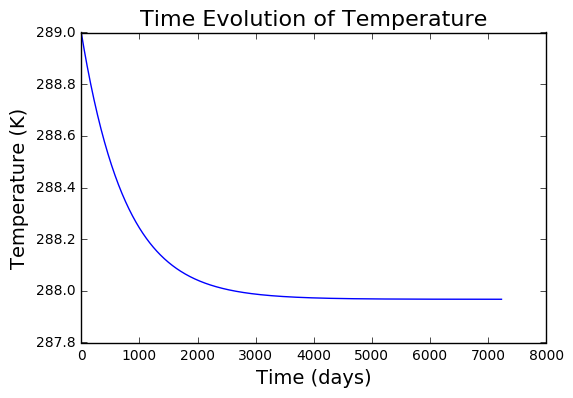

In [3]:
# Your code to plot the temperature goes here
plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.plot(model_time, temp_series)
plt.show()

b.	Use a print statement(s) to output the number of time steps needed to approach equilibrium, and the equilibrium temperature.

In [4]:
print('Equiblirium temperature: {:0.5f} K'.format(equilibrium_temperature))
print('Total convergance steps: {}'.format(steps))

Equiblirium temperature: 287.96738 K
Total convergance steps: 724


c.	Use a print statement to output the amount of "model time" this corresponds to.

In [5]:
print('Model time: {} days'.format(steps * time_step))

Model time: 7240 days


## 2.	Using nested loops, run the model to equilibrium for 10-15 different initial conditions between 220 and 300 K. 

Be sure to run the model for enough time steps so that all simulations reach equilibrium. (You can combine parts a-c in one block of code as long as the output is clear and it is easy to find all the answers.) 

In [6]:
# Provide a general description of this model 
"""
This time we make multiple calls to `calculate_temperature` function using different initial conditions. These initial
conditions are 80 values between 220 and 300 K.
"""
init_temps = np.linspace(220, 300, 320)   # list of initial conditions (K)
print_outputs = []                        # collects output values to print in following sections
plot_outputs = []

for temp in init_temps:
    time_step = 5    # time step in days
    model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(temp, time_step)
    print_outputs.append([temp, equilibrium_temperature, equilibrium_temperature - temp, steps, steps * time_step])
    plot_outputs.append([model_time, temp_series])

a.	Output the equilibrium temperatures values for all the runs.

In [7]:
print('Start temp. (K)\t\tEquil. temp. (K)\tTemp. diff (K)\tTotal steps\tModel time (days)')
for row in print_outputs:
    if abs(row[2]) < 0.05:
        """
        row[2] holds the difference between initial and final temperatures.
        An almost zero value for row[0] means we started at almost a stable state.
        Those cases are printed in green.
        """
        print(color_format('{:^15.5f}\t\t{:^16.5f}\t{:^14.5f}\t{:^11.0f}\t{:^17.0f}'.format(*row), 'green'))
    else:
        print('{:^15.5f}\t\t{:^16.5f}\t{:^14.5f}\t{:^11.0f}\t{:^17.0f}'.format(*row))

Start temp. (K)		Equil. temp. (K)	Temp. diff (K)	Total steps	Model time (days)
   220.00000   		   232.99599    	   12.99599   	   3118    	      15590      
   220.25078   		   232.99599    	   12.74521   	   3112    	      15560      
   220.50157   		   232.99599    	   12.49442   	   3106    	      15530      
   220.75235   		   232.99599    	   12.24364   	   3100    	      15500      
   221.00313   		   232.99599    	   11.99285   	   3093    	      15465      
   221.25392   		   232.99599    	   11.74207   	   3087    	      15435      
   221.50470   		   232.99599    	   11.49129   	   3080    	      15400      
   221.75549   		   232.99599    	   11.24050   	   3073    	      15365      
   222.00627   		   232.99599    	   10.98972   	   3066    	      15330      
   222.25705   		   232.99599    	   10.73894   	   3059    	      15295      
   222.50784   		   232.99599    	   10.48815   	   3052    	      15260      
   222.75862   		   232.99599    	   10.23737   	   

b. Compare these numerical equilibrium solutions to the analytical steady state solutions (given in Lecture 2). (Be sure to include the specific numbers from the lecture. Use complete sentences.) 

The table above shows 2 stable equilibrium that all tempeartures converge to. Those values are almost the same as the ones mentioned in the lecture.

|             | From Model| From Lecture |
| ----------- | --------- | ------- |
| T1          | 232.99642 | 233.00  |
| T3          | 287.96738 | 287.97  |

The unstable equilibrium, i.e. 265.35 K, does not appear in the table. It is an unstable equilibrium and unless our model hits exactly that value, it would never occur.

c. Plot the temperatures for all the initial condition cases as time series on the same plot.  

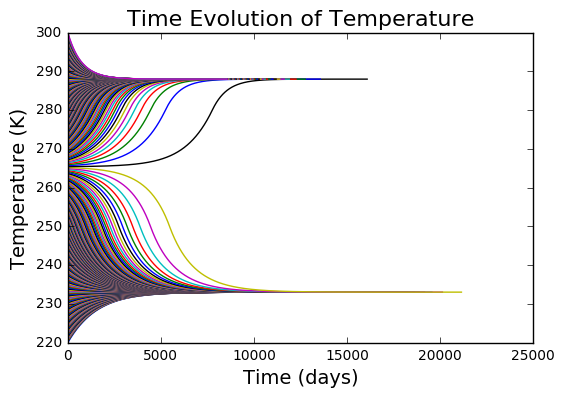

In [8]:
plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
for output in plot_outputs:
    plt.plot(*output)
plt.show()

d. Describe how the time series of the temperature depends on the initial conditions, based on the plot. 

Based on the plot and the table above, the biggest change in temperature happens when we pass the equilibrium in the unstable part of albedo function, i.e. 250 < T < 280 (K), for the given solar constant (320 W/m2). As temperature rises and we pass 265.34 K, `ASR` increases faster than `OLR` and we start having net warming instead of net cooling.

## 3.	For one of the initial condition cases, increase the time step until the model becomes unstable.  (I suggest starting by increasing the time step by an order of magnitude the first couple times.)

Based on these results, choose 4 values of time step that show: a) a steady case with a large time step, b) a case that overshoots the equilibrium temperature, c) a case that appears to oscillate randomly around an equilibrium temperaure, and d) a case that becomes unstable.  Plot a time series for each of these cases as described below:

a.	Run the model and plot the temperature as a function of time for the stable case, using a large time step. 

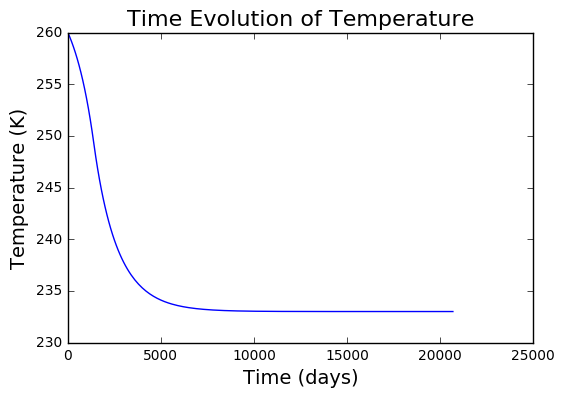

In [9]:
time_step = 100    # time step in days
model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(260, time_step)

plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.plot(model_time, temp_series)
plt.show()

b.	Run the model and plot the temperature as a function of time for the overshooting case. 

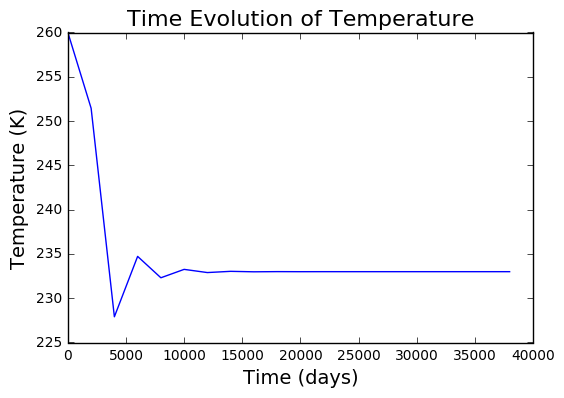

In [10]:
time_step = 2000    # time step in days
model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(260, time_step)

plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.plot(model_time, temp_series)
plt.show()

c.	Run the model and plot the temperature as a function of time for the "randomly oscillating" case. 

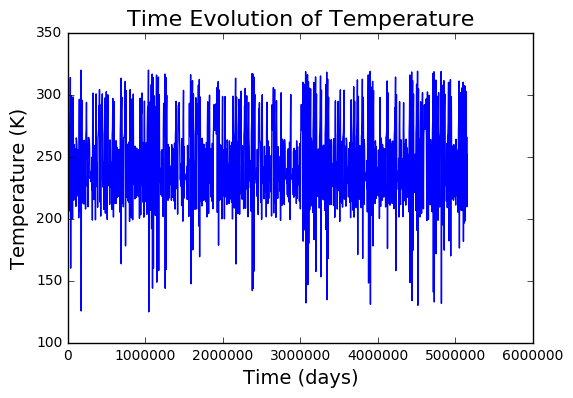

In [11]:
time_step = 4000    # time step in days
model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(260, time_step, 0.05)

plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.plot(model_time, temp_series)
plt.show()

d.	Run the model and plot the temperature as a function of time for the unstable case.  Run the model just long enough to show that it is unstable. Depending on the time step you use, you may only be able to run the model for a few time steps.  (This will take some trial and error.) 

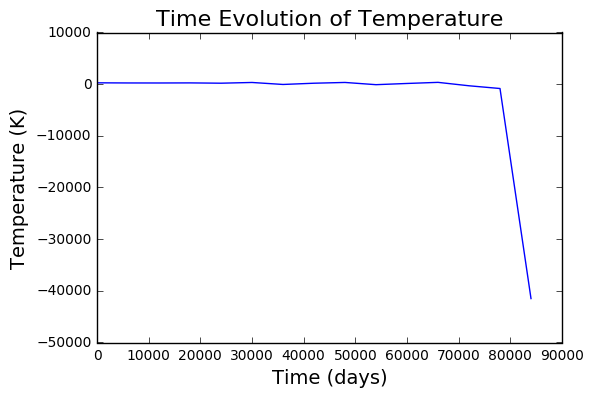

In [12]:
time_step = 6000    # time step in days
model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(260, time_step, max_steps=15)

plt.title('Time Evolution of Temperature', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.plot(model_time, temp_series)
plt.show()

e.	Describe the plots for these 4 cases. Why does the model become unstable?

Equilibria:
* T1: 233, T2: 265.35, T3: 287.97
* Tu: 280, Tl: 250

Initial condition: 260 K
* Plot a (time step: 100 days): on each step the model stays between T1 and T2, so we get a negative radiative flux until the model becomes stable.
* Plot b (time step: 2000): in the beginning the model is in a cooling state, but the time step is big enough to push the model below T1 and it enters a warming state on the next step. Still temperature change after the first step is close enough to the stable state that after few more steps we reach equilibrium.
* Plot c (time step: 2500): The first temperature change is like plot b, but the result is too far from a steady state and the model keeps oscillating for more steps untill it becomes stable.
* Plot d (time step: 5000): Here the time step is too big and it causes huge changes in temperature in each step and the model falls either above or below equilibria (T1 and T3) and can never converge.

## 4.	**For ATS 521 Students**: 

a. Which parameter would you modify to add more greenhouse gases to the atmosphere?

    Effective emissivity

b. Would you increase or decrease the magnitude of this parameter (if you added GHGs)?

    I would decrease effective emissivity as it reduces Outgoing Longwave Radiation.

c. What value corresponds to an atmosphere with an emissivity of 1? (Hint: use the diagram of LW fluxes in Lecture 2.)  Is there a way you could modify the diagram (i.e., vertical structure of the column) to get a value even smaller than this?

    An atmosphere with emissivity on 1 acts as a black body, which means it absorbs all the LW radiation emitted from surface. Atmosphere also emits equally in both directions (out into the space and back at the surface). It corresponds to kappa = 0.5, as it can be seen in the equation below:
\begin{align}
\delta T_s^4 = 2\delta T_a^4 => 0.5 T_s^4 = T_a^4
\end{align}

d. What range of values for this parameter (to two significant digits) results in multiple equilibria?

    An effective emissivity between ~0.47 and ~0.68 results in 3 equilibria.

e. Plot (similar to the plots in Q. 2, with multiple initial conditions in one plot) and describe the time series for a few examples of parameter values inside and outside of this range, including some near the transition points. 

    See code cell below for the plots. The first and last plots are for effective emissivities that result in only one equilibrium. In the first case we only observer net warming, while in the latter case our model only goes through net cooling.

f. Explain how changes in this parameter alter the possible equilibria (from a physical standpoint).

    An increase (decrease) in effective emissivity means more (less) Outgoing Longwave Radiation and less (more) GHG in the atmosphere; as a result of this, our model becomes cooler (warmer).

*Use Markdown cells for answers to questions.*

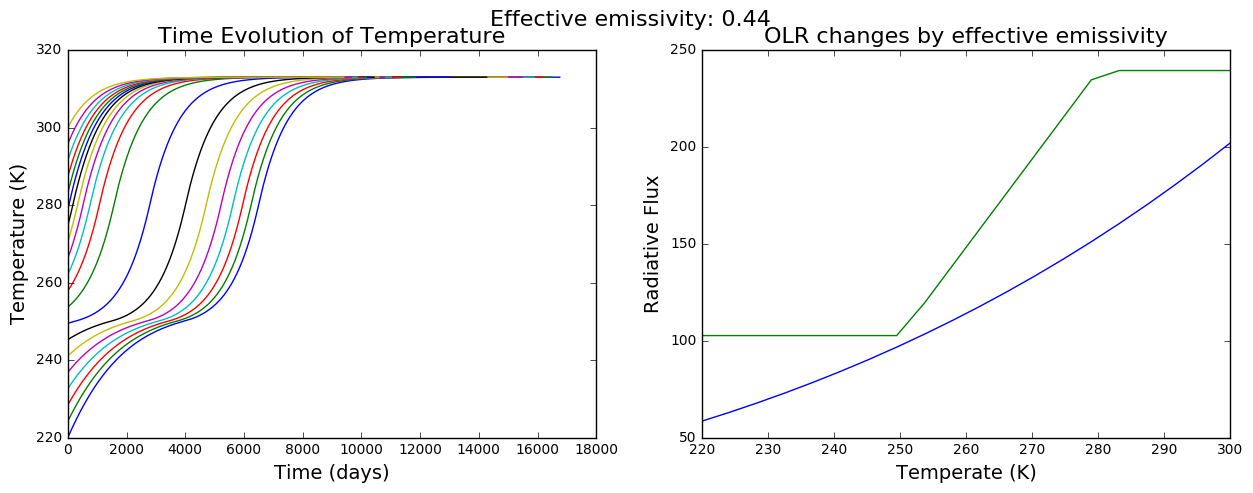

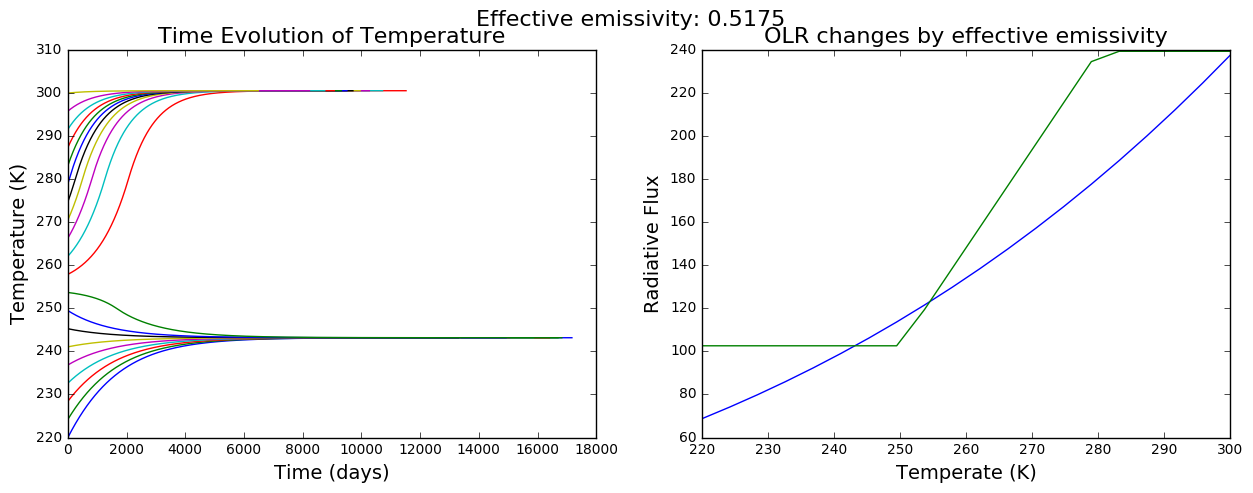

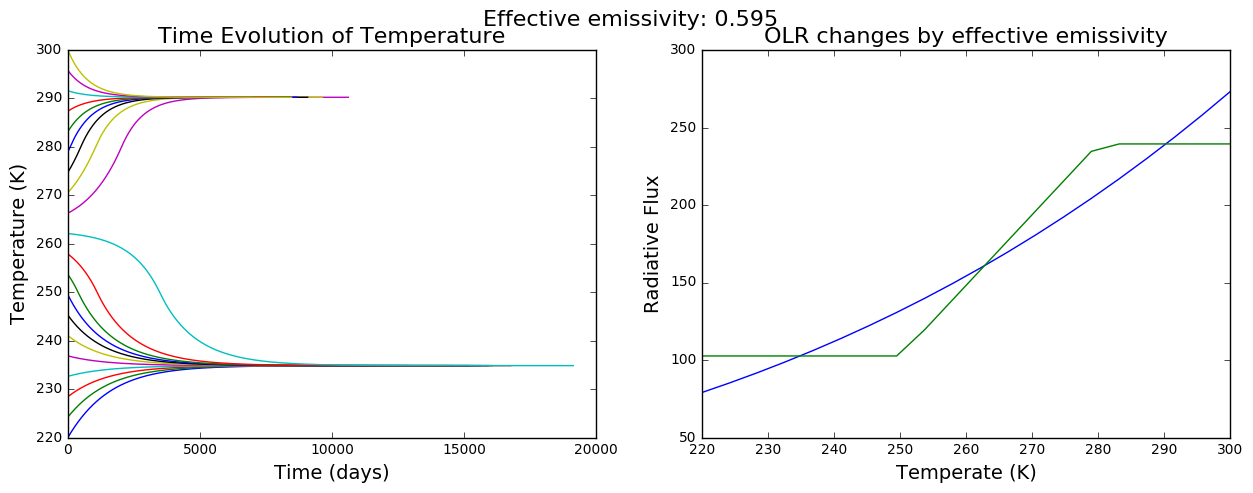

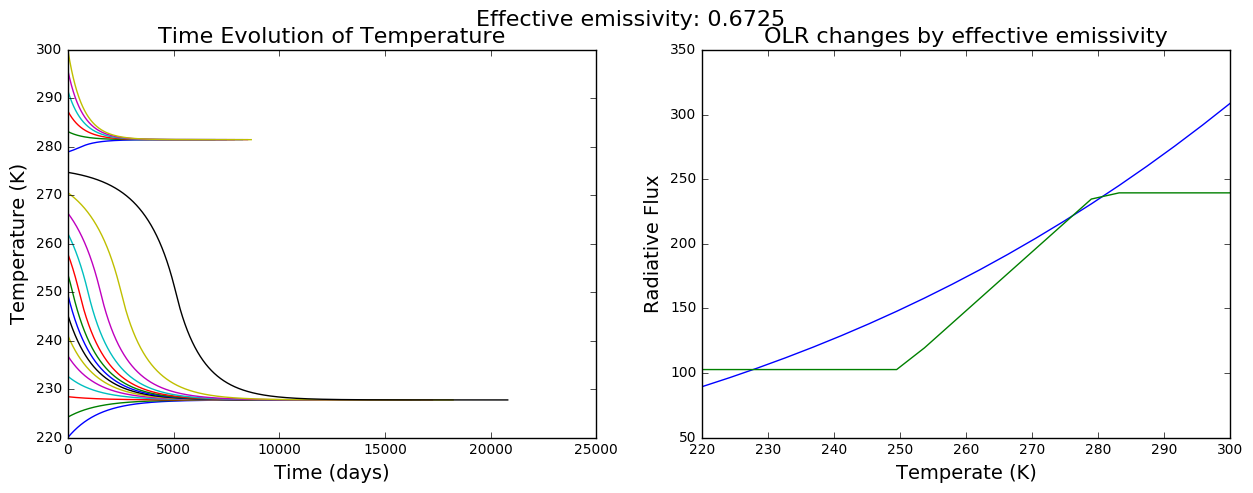

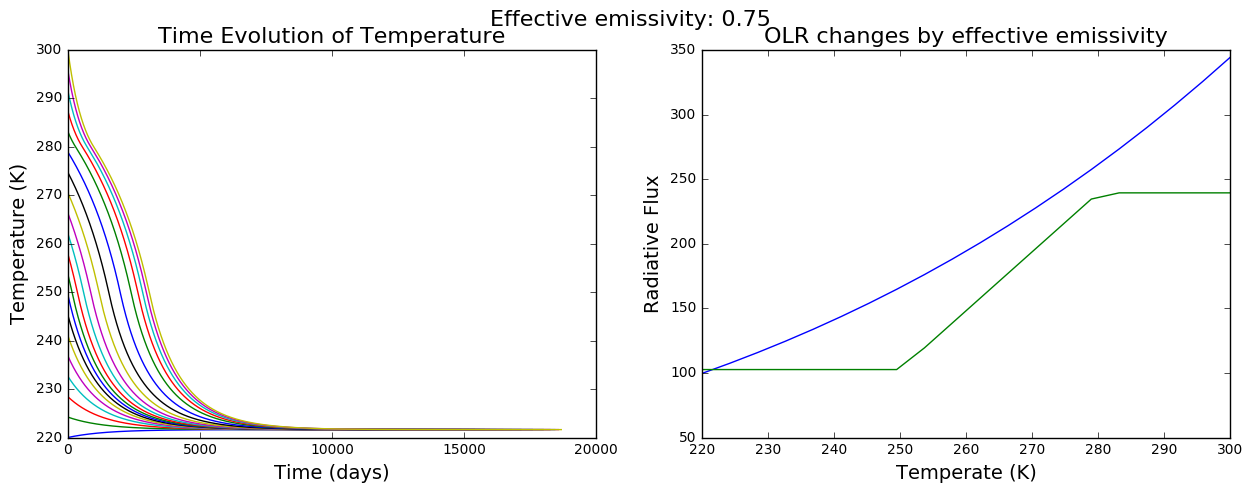

In [13]:
# Plots for Question 4, part e:
effective_emiss_series = np.linspace(0.44, 0.75, 5)    # 5 samples for effective emissivity

for effective_emiss in effective_emiss_series:
    # effective_emiss is overridden here and this updated value is used by OLR function
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.set_title('Time Evolution of Temperature', fontsize=16)
    ax1.set_xlabel('Time (days)', fontsize=14)
    ax1.set_ylabel('Temperature (K)',fontsize=14)

    ax2.set_title('OLR changes by effective emissivity', fontsize=16)
    ax2.set_xlabel('Temperate (K)', fontsize=14)
    ax2.set_ylabel('Radiative Flux', fontsize=14)
    
    inp = []
    asr = []
    olr = []
    for t in np.linspace(220, 300, 20):
        time_step = 5    # time step in days
        model_time, temp_series, equilibrium_temperature, steps = calculate_temperature(t, time_step)
        ax1.plot(model_time, temp_series, label=effective_emiss)
        
        inp.append(t)
        asr.append(ASR(t))
        olr.append(OLR(t))
    
    ax2.plot(inp, olr)
    ax2.plot(inp, asr)

    plt.suptitle('Effective emissivity: {}'.format(effective_emiss), fontsize=16)
    plt.show()

## Checklist

* Notebook re-runs correctly ("Kernel" -> "Restart and run all" works)
* All variables are commented with short variable decription (if not obvious from variable name) and units
* Include sufficient commenting in code that someone could look at portions and easily understand your methodology.
* Plots include titles, labels (with units) on x and y axes, and legends (if multiple lines). (Titles/legends are not necessary if they convey no more information than x and y axis labels.)
* Numerical values in Markdown or print statements include units.
* Answers to “compare,” “explain,” etc. questions are in complete sentences and grammatically correct. 

